In [41]:
pip install meteostat


[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
from meteostat import Point, Daily

# Thiết lập thời gian
start = datetime(2020, 1, 1)
end = datetime(2020, 12, 31)


hochiminh = Point(10.7769, 106.7009, 19)  


data = Daily(hochiminh, start, end)
data = data.fetch()

# Hiển thị dữ liệu
print(data.head())

# Lưu dữ liệu ra file CSV

data.to_csv('weather_data_hochiminh_2020.csv', index=True)
print("Dữ liệu đã được lưu vào file 'weather_data_hochiminh_2020.csv'.")

            tavg  tmin  tmax  prcp  snow  wdir  wspd  wpgt    pres  tsun
time                                                                    
2020-01-01  28.6  22.0  35.0   NaN   NaN  47.0  10.4   NaN  1014.0   NaN
2020-01-02  28.9  23.0  35.0   NaN   NaN  70.0   9.8   NaN  1014.2   NaN
2020-01-03  28.6  24.0  34.0   NaN   NaN  38.0   7.2   NaN  1013.1   NaN
2020-01-04  27.4  24.0  33.0   NaN   NaN  43.0   6.6   NaN  1011.4   NaN
2020-01-05  27.3  23.0  33.0   NaN   NaN  12.0   6.7   NaN  1011.5   NaN
Dữ liệu đã được lưu vào file 'weather_data_hochiminh_2020.csv'.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('data/weather_data_hochiminh_2020.csv', index_col='time', parse_dates=True)
data.drop(columns=['prcp','snow','wpgt','tsun'], inplace=   True)
print('Shape of data:', data.shape)

data.head(10)


Shape of data: (366, 6)


,tavg,tmin,tmax,wdir,wspd,pres
time,,,,,,
2020-01-01,28.6,22,35.0,47,10.4,1014.0
2020-01-02,28.9,23,35.0,70,9.8,1014.2
2020-01-03,28.6,24,34.0,38,7.2,1013.1
2020-01-04,27.4,24,33.0,43,6.6,1011.4
2020-01-05,27.3,23,33.0,12,6.7,1011.5
2020-01-06,28.6,23,34.0,54,7.1,1011.6
2020-01-07,29.4,24,35.0,98,7.9,1010.6
2020-01-08,28.6,25,35.0,85,8.4,1010.3
2020-01-09,28.7,24,35.0,104,8.6,1009.2


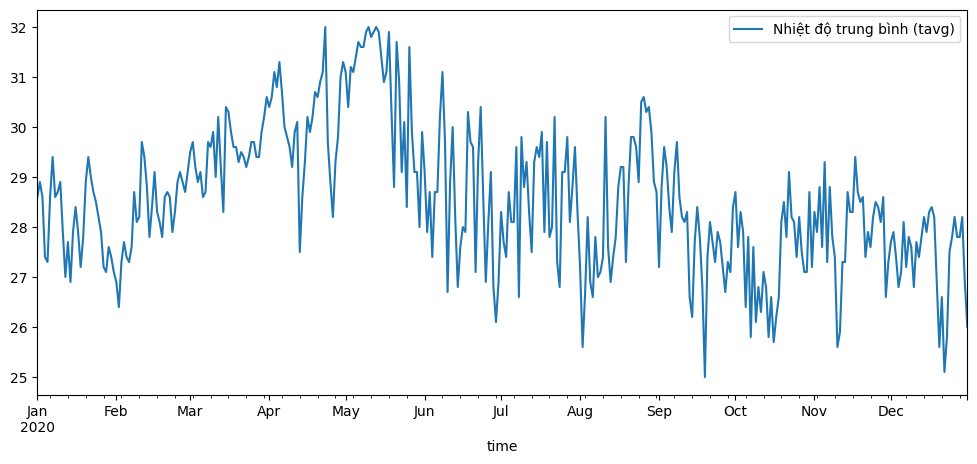

In [4]:
plt.figure(figsize=(12,5))

data['tavg'].plot( label = 'Nhiệt độ trung bình (tavg)')

plt.legend()
plt.show()

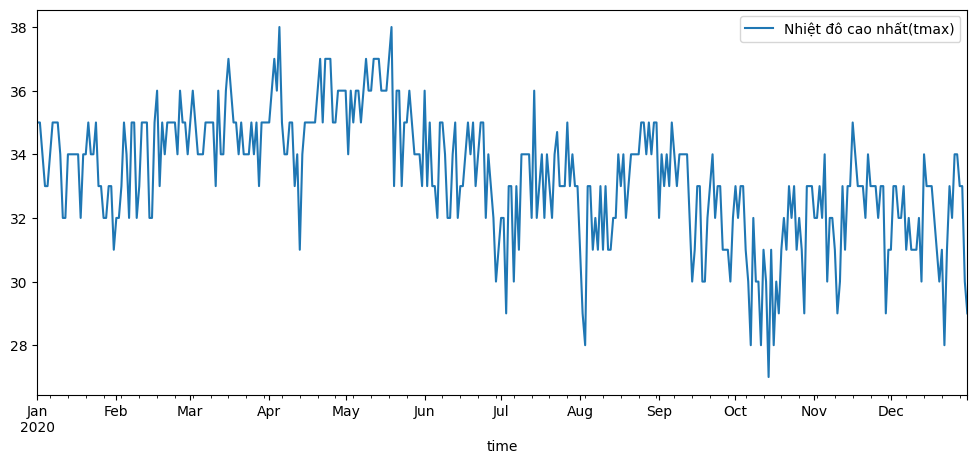

In [5]:
plt.figure(figsize=(12,5))
data['tmax'].plot( label = 'Nhiệt đô cao nhất(tmax)')

plt.legend()
plt.show()

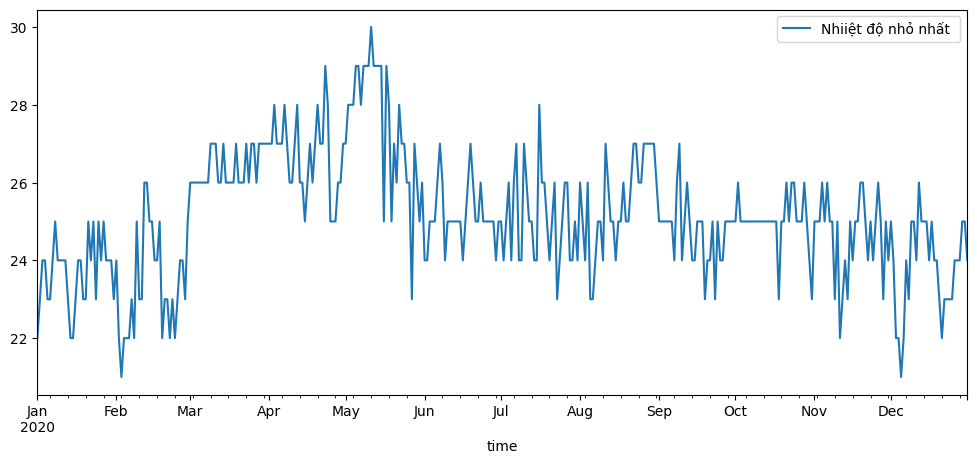

In [6]:
plt.figure(figsize=(12,5))
data['tmin'].plot( label = 'Nhiiệt độ nhỏ nhất ')

plt.legend()
plt.show()


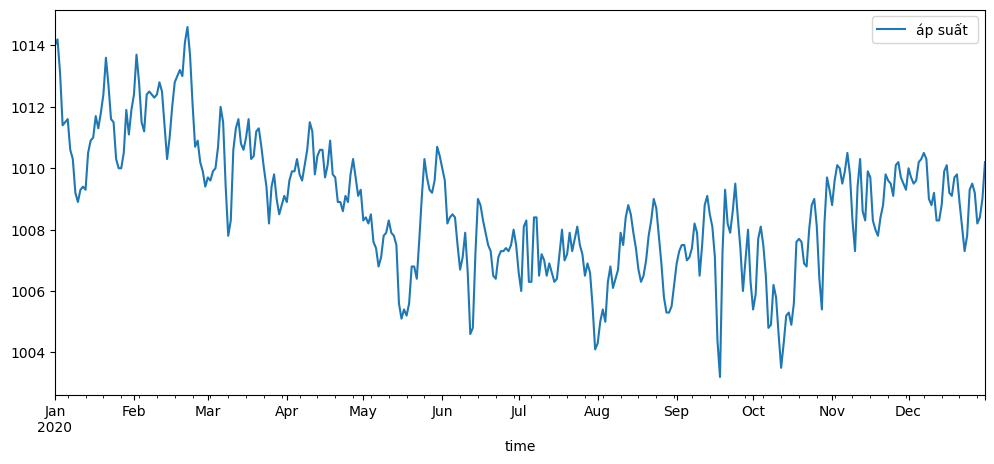

In [7]:
plt.figure(figsize=(12,5))
data['pres'].plot( label = 'áp suất ')

plt.legend()
plt.show()


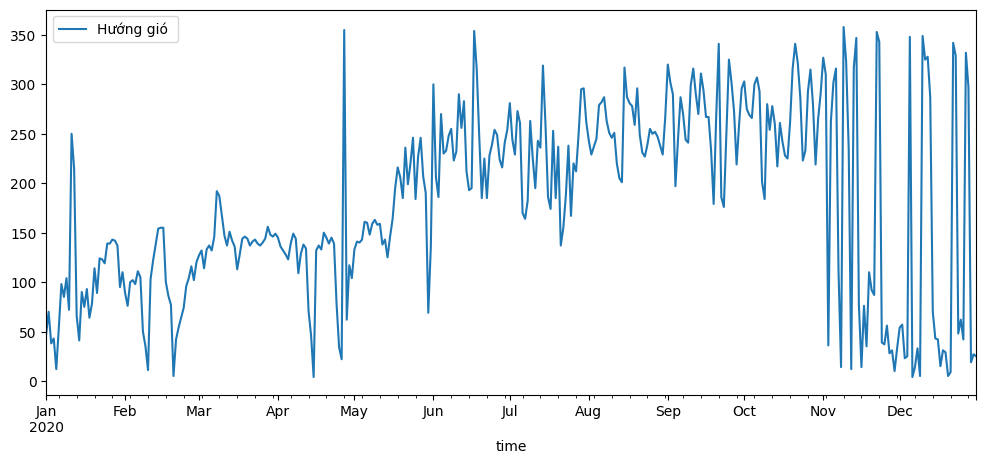

In [8]:
plt.figure(figsize=(12,5))
data['wdir'].plot( label = 'Hướng gió ')

plt.legend()
plt.show()


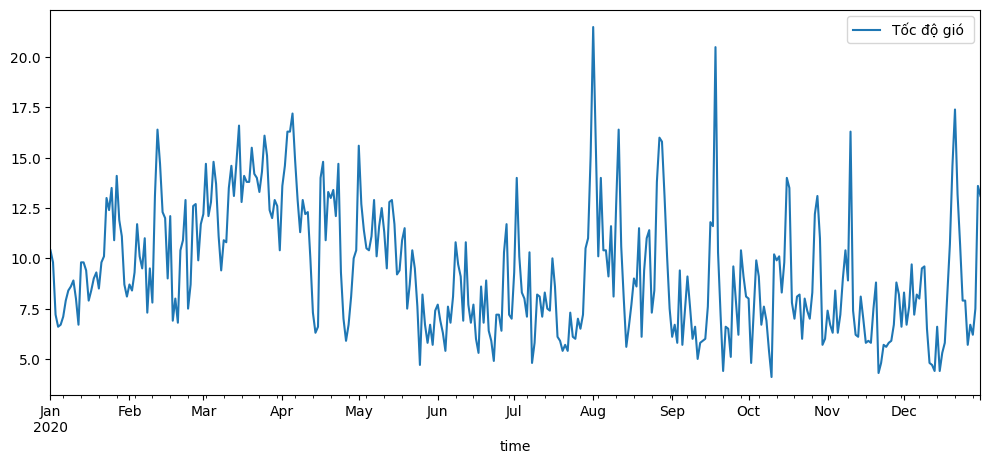

In [9]:
plt.figure(figsize=(12,5))
data['wspd'].plot( label = 'Tốc độ gió ')

plt.legend()
plt.show()


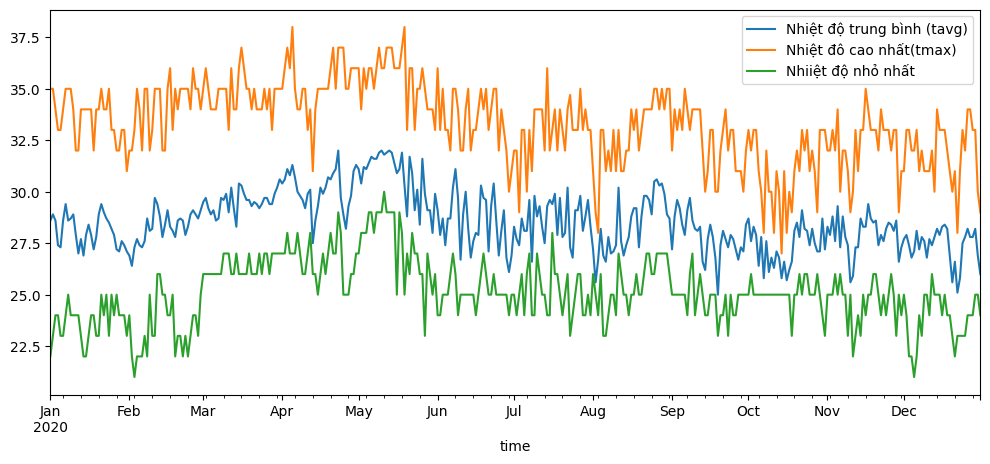

In [10]:
plt.figure(figsize=(12,5))

data['tavg'].plot( label = 'Nhiệt độ trung bình (tavg)')
data['tmax'].plot( label = 'Nhiệt đô cao nhất(tmax)')
data['tmin'].plot( label = 'Nhiiệt độ nhỏ nhất ')

plt.legend()
plt.show()

Check for Stationarity

In [11]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [12]:
adf_test(data['tavg'])

1. ADF :  -2.114969329117273
2. P-Value :  0.23853811649101242
3. Num Of Lags :  9
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 356
5. Critical Values :
	 1% :  -3.448853029339765
	 5% :  -2.869693115704379
	 10% :  -2.571113512498422


In [13]:
from pmdarima import auto_arima

import warnings 
warnings.filterwarnings("ignore")

In [59]:
stepwise_fit = auto_arima(data['tavg'], suppress_warnings= True)

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  366
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -482.195
Date:                Thu, 17 Oct 2024   AIC                            970.389
Time:                        12:30:30   BIC                            982.089
Sample:                    01-01-2020   HQIC                           975.039
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3610      0.064      5.597      0.000       0.235       0.487
ma.L1         -0.8521      0.039    -21.692      0.000      -0.929      -0.775
sigma2         0.8207      0.056     14.564      0.000       0.710       0.931
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 8.72
Prob(Q):                              0.96   Prob(JB):                         0.01
Heteroskedasticity (H):               1.67   Skew:                            -0.35
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
from statsmodels.tsa.arima_model import ARIMA


In [61]:
print(data.shape)
train = data.iloc[:-30]
test = data.iloc[-30:]
print(train.shape, test.shape)
print(test.iloc[0], test.iloc[-1])

(366, 6)
(336, 6) (30, 6)
tavg      27.9
tmin      24.0
tmax      33.0
wdir      57.0
wspd       6.7
pres    1009.7
Name: 2020-12-02 00:00:00, dtype: float64 tavg      26.0
tmin      24.0
tmax      29.0
wdir      25.0
wspd      13.1
pres    1010.2
Name: 2020-12-31 00:00:00, dtype: float64


In [63]:

from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['tavg'],order=(1,1,1))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   tavg   No. Observations:                  336
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -446.880
Date:                Thu, 17 Oct 2024   AIC                            899.759
Time:                        12:33:41   BIC                            911.202
Sample:                    01-01-2020   HQIC                           904.321
                         - 12-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3223      0.070      4.608      0.000       0.185       0.459
ma.L1         -0.8320      0.045    -18.447      0.000      -0.920      -0.744
sigma2         0.8420      0.061     13.872      0.000       0.723       0.961
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 7.39
Prob(Q):                              0.91   Prob(JB):                         0.02
Heteroskedasticity (H):               1.99   Skew:                            -0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='time'>

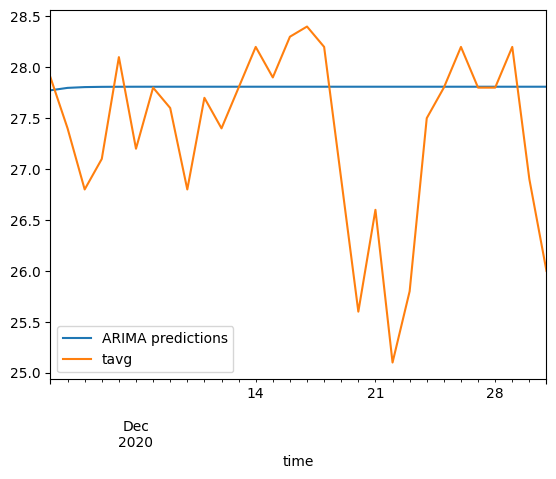

In [64]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
pred.plot(legend=True)
test['tavg'].plot(legend=True)


<Axes: xlabel='time'>

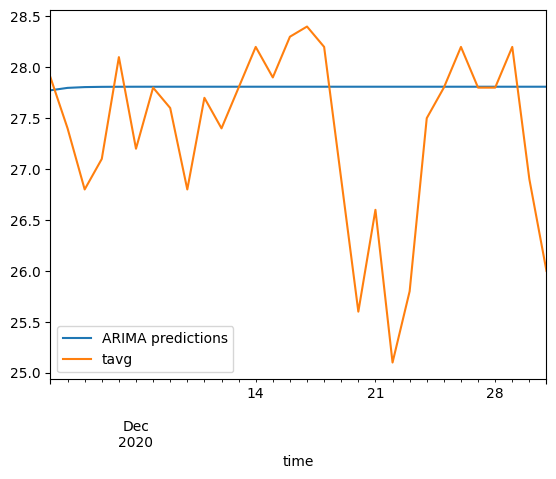

In [66]:

pred.plot(legend='ARIMA Predictions')
test['tavg'].plot(legend=True)
     

In [67]:
test['tavg'].mean()

27.360000000000003

In [68]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['tavg']))
print(rmse)

0.9544409230205914


In [69]:
model2=ARIMA(data['tavg'],order=(1,1,1))
model2=model2.fit()
data.tail()
     

,tavg,tmin,tmax,wdir,wspd,pres
time,,,,,,
2020-12-27,27.8,24.0,34.0,332.0,6.7,1009.2
2020-12-28,27.8,24.0,33.0,297.0,6.2,1008.2
2020-12-29,28.2,25.0,33.0,19.0,7.5,1008.4
2020-12-30,26.9,25.0,30.0,27.0,13.6,1009.0
2020-12-31,26.0,24.0,29.0,25.0,13.1,1010.2


In [73]:
index_future_dates=pd.date_range(start='2020-12-30',end='2021-01-13')
#print(index_future_dates)
pred=model2.predict(start=len(data),end=len(data)+14,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)


2020-12-30    26.692564
2020-12-31    26.942586
2021-01-01    27.032847
2021-01-02    27.065432
2021-01-03    27.077195
2021-01-04    27.081442
2021-01-05    27.082975
2021-01-06    27.083528
2021-01-07    27.083728
2021-01-08    27.083800
2021-01-09    27.083826
2021-01-10    27.083836
2021-01-11    27.083839
2021-01-12    27.083840
2021-01-13    27.083841
Freq: D, Name: ARIMA Predictions, dtype: float64


<Axes: >

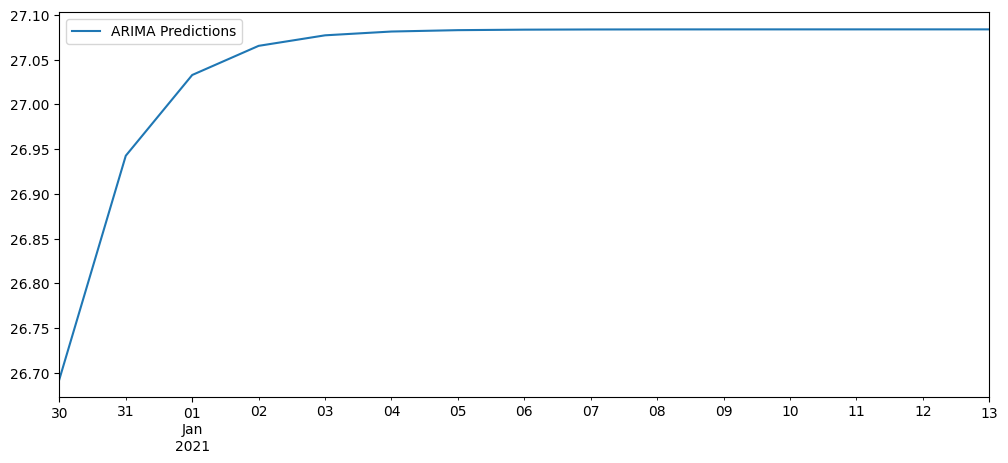

In [74]:
pred.plot(figsize=(12,5),legend=True)